## Домашнее задание 1
### Пункт 1
> Выбрать и загрузить датасет с помощью библиотеки Pandas. Датасет должен относиться к задаче классификации, содержать категориальные данные. Реализовать код, вносящий случайные искажения в данные.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel, SequentialFeatureSelector
from sklearn.metrics import accuracy_score

# https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package
df = pd.read_csv('weatherAUS.csv')

print("Размер датасета:", df.shape)
print("\nТипы данных:")
print(df.dtypes, '\n')
print(df.dtypes.value_counts(), '\n')
df.head(5)

Размер датасета: (145460, 23)

Типы данных:
Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object 

float64    16
object      7
Name: count, dtype: int64 



,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [2]:
# функция для внесения случайных искажений
def add_random_distortions(data, distortion_rate=0.05):
    distorted_data = data.copy()
    n_rows, n_cols = distorted_data.shape

    # добавление пропущенных значений
    for col in distorted_data.columns:
        if distorted_data[col].dtype in ['float64']:
            # выбираем строки в которых будут искажения (для конкретного столбца)
            mask = np.random.random(n_rows) < distortion_rate
            distorted_data.loc[mask, col] = np.nan

    # добавление выбросов
    numerical_cols = distorted_data.select_dtypes(include=['float64']).columns
    for col in numerical_cols:
        mask = np.random.random(n_rows) < distortion_rate
        # машстабируем выбросы до 5 стандартных отклонений
        outliers = distorted_data[col].mean() + 5 * distorted_data[col].std() * np.random.randn(mask.sum())
        distorted_data.loc[mask, col] = outliers

    return distorted_data


# Применяем искажения
df_distorted = add_random_distortions(df)
print("Данные после искажений:")
print(f"Пропуски в исходных данных: {df.isnull().sum().sum()}")
print(f"Пропуски в искаженных данных: {df_distorted.isnull().sum().sum()}")

# дальше буду использовать неизмененные данные, т.к. в датасете искажений итак достаточно


Данные после искажений:
Пропуски в исходных данных: 343248
Пропуски в искаженных данных: 423218


## Пункт 2
> С помощью библиотеки Pandas произвести предварительный анализ датасета на наличие пропусков и искажений. Произвести исправление данных, используя 3 различные стратегии.

In [3]:
# aнализ пропусков
print("Анализ пропусков в данных:")
missing_data = df.isnull().sum()
missing_percent = (missing_data / len(df)) * 100
missing_info = pd.DataFrame({
    'Колонка': df.columns,
    'Пропуски': missing_data,
    'Процент пропусков': missing_percent
})
print(missing_info[missing_info['Пропуски'] > 0].sort_values('Процент пропусков', ascending=False))

Анализ пропусков в данных:
                     Колонка  Пропуски  Процент пропусков
Sunshine            Sunshine     69835          48.009762
Evaporation      Evaporation     62790          43.166506
Cloud3pm            Cloud3pm     59358          40.807095
Cloud9am            Cloud9am     55888          38.421559
Pressure9am      Pressure9am     15065          10.356799
Pressure3pm      Pressure3pm     15028          10.331363
WindDir9am        WindDir9am     10566           7.263853
WindGustDir      WindGustDir     10326           7.098859
WindGustSpeed  WindGustSpeed     10263           7.055548
Humidity3pm      Humidity3pm      4507           3.098446
WindDir3pm        WindDir3pm      4228           2.906641
Temp3pm              Temp3pm      3609           2.481094
RainTomorrow    RainTomorrow      3267           2.245978
Rainfall            Rainfall      3261           2.241853
RainToday          RainToday      3261           2.241853
WindSpeed3pm    WindSpeed3pm      3062       

In [4]:
# 1: удаление строк с большим количеством пропусков
df_strategy1 = df.dropna().copy()

# 2: заполнение числовых данных медианой, категориальных - модой
df_strategy2 = df.copy()

numerical_cols = df_strategy2.select_dtypes(include=['float64']).columns
categorical_cols = df_strategy2.select_dtypes(include=['object']).columns

# заполняем числовые колонки
for col in numerical_cols:
    median_val = df_strategy2[col].median()
    df_strategy2[col] = df_strategy2[col].fillna(median_val)

# заполняем категориальные колонки
for col in categorical_cols:
    if col != 'RainTomorrow': # не трогаем целевую переменную
        mode_val = df_strategy2[col].mode()
        df_strategy2[col] = df_strategy2[col].fillna(mode_val[0])

# 3: интерполяция по данным отсортированным по локациям и датам
df_strategy3 = df.copy()
df_strategy3['Date'] = pd.to_datetime(df_strategy3['Date'])
df_strategy3 = df_strategy3.sort_values(['Location', 'Date']).copy()

df_strategy3[numerical_cols] = df_strategy3.groupby('Location')[numerical_cols].transform(
    lambda x: x.interpolate(method='linear').bfill().ffill()
)

# заполняем категориальные колонки также модой
for col in categorical_cols:
    if col not in ['Date', 'RainTomorrow']:
        mode_val = df_strategy3[col].mode()
        df_strategy3[col] = df_strategy3[col].fillna(mode_val[0])

print("результаты:")
print(f"1: удаление: осталось {df_strategy1.isnull().sum().sum()} пропусков, осталось значений {df_strategy1.size}/{df.size}")
print(f"2: медиана, мода: {df_strategy2.isnull().sum().sum()} пропусков осталось")
print(f"3: интерполяция, мода: {df_strategy3.isnull().sum().sum()} пропусков осталось")

результаты:
1: удаление: осталось 0 пропусков, осталось значений 1297660/3345580
2: медиана, мода: 3267 пропусков осталось
3: интерполяция, мода: 202198 пропусков осталось


> Интерполяция в данном случае работает не очень, т.к. есть колонки в которых очень много последовательных пропусков. Я выбрал стратегию 1 как основную.

## Пункт 3
> С помощью библиотеки matplotlib построить графики исходных данных для каждой пары признако. Сделать выводы о зависимости признаков.

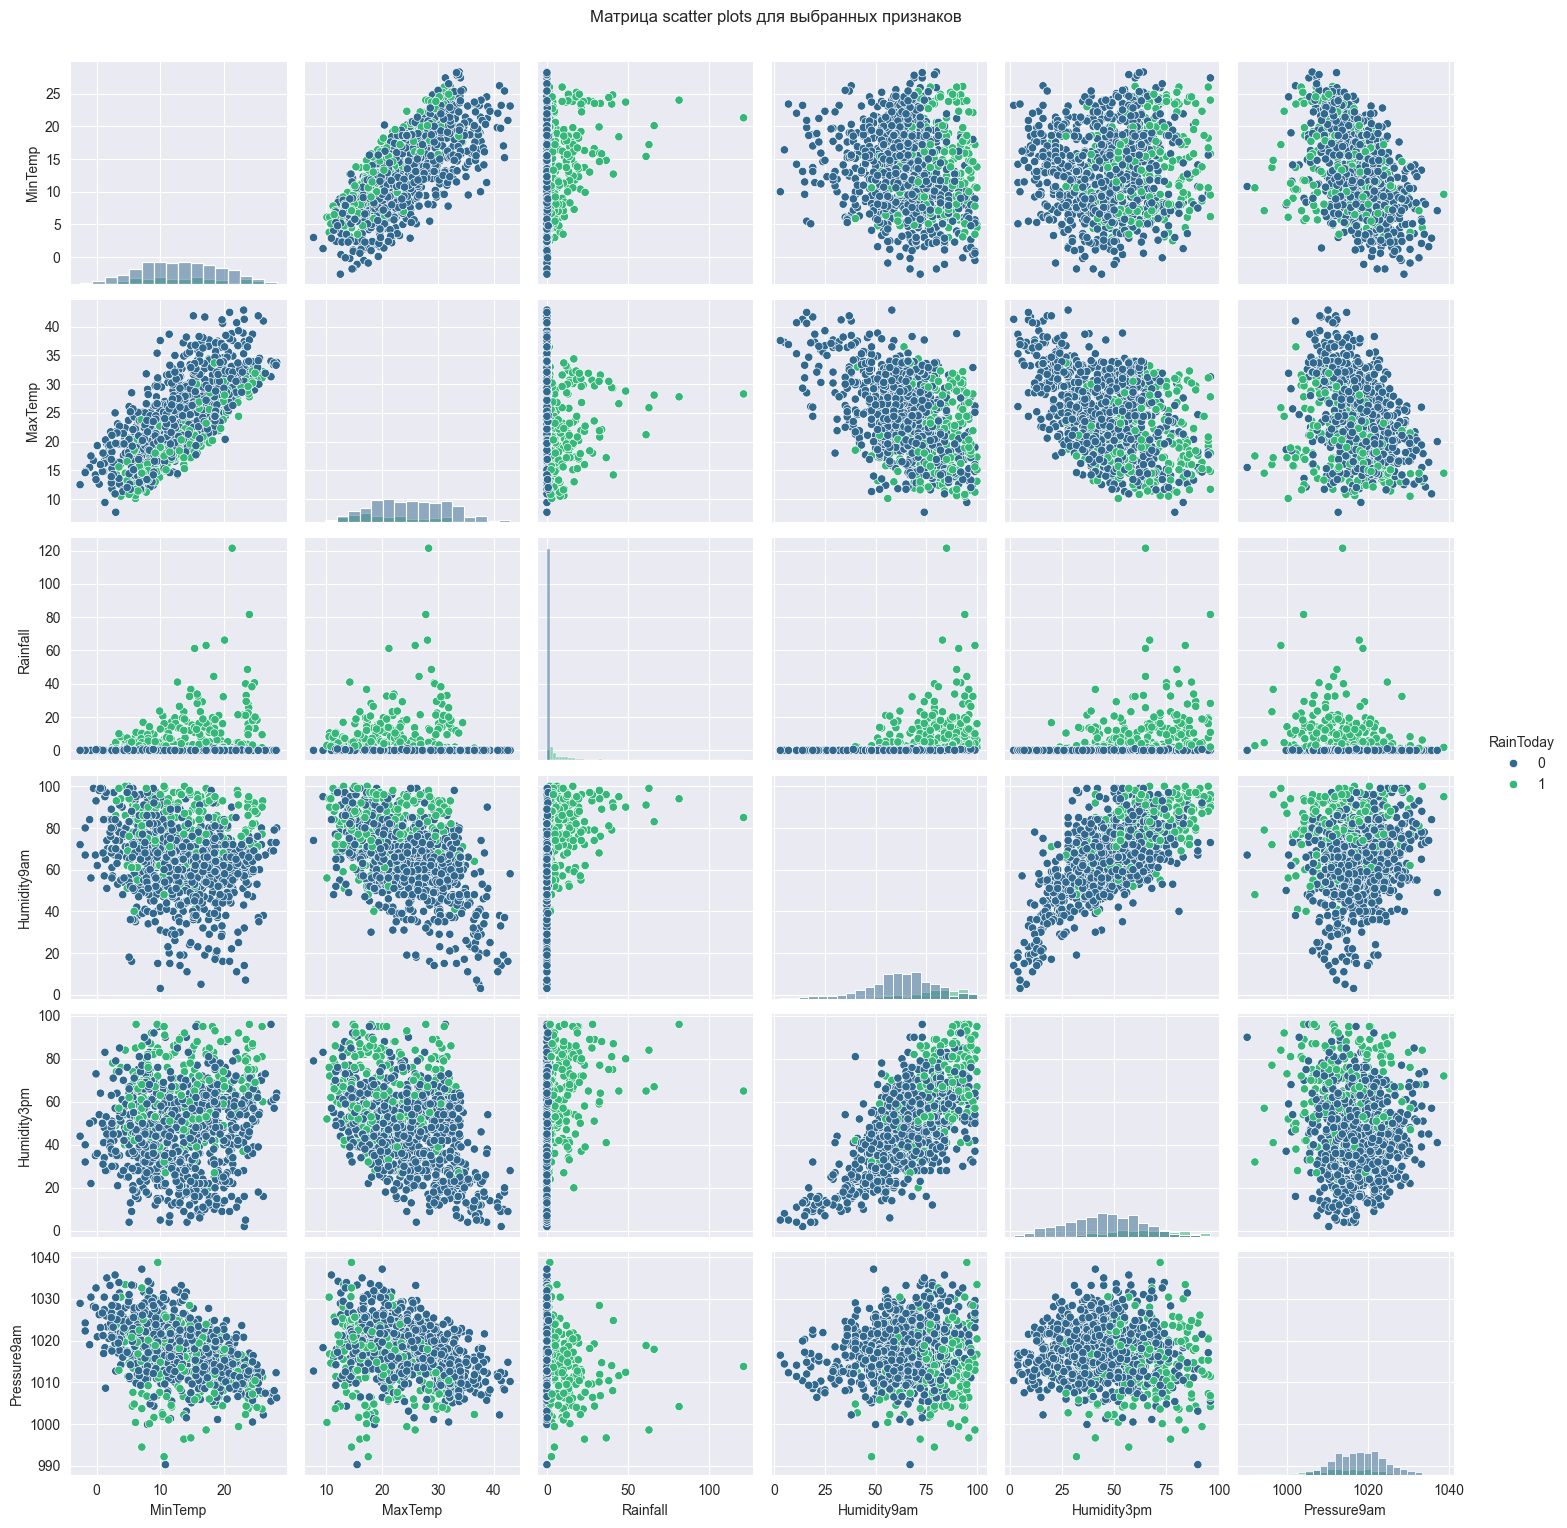

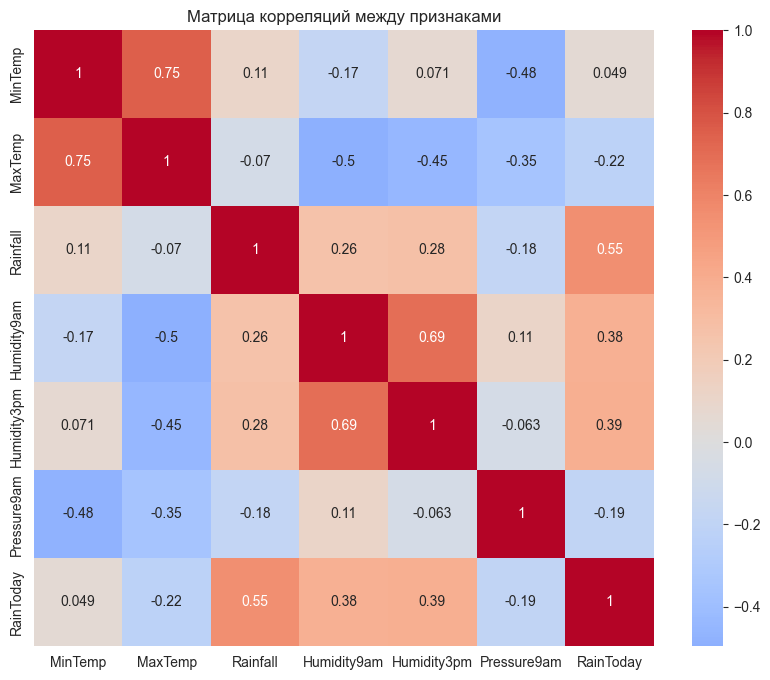

In [5]:
# выберем часть числовых признаков для визуализации
numerical_features = ['MinTemp', 'MaxTemp', 'Rainfall', 'Humidity9am', 'Humidity3pm', 'Pressure9am']
df_viz = df_strategy1[numerical_features + ['RainToday']].dropna()
df_viz['RainToday'] = df_viz['RainToday'].map({'Yes': 1, 'No': 0})

# матрица scatter plots
sns.pairplot(df_viz.sample(1000), hue='RainToday', diag_kind='hist', palette='viridis')
plt.suptitle('Матрица scatter plots для выбранных признаков', y=1.02)
plt.show()

# heatmap корреляций
plt.figure(figsize=(10, 8))
correlation_matrix = df_viz.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Матрица корреляций между признаками')
plt.show()

### Выводы по визуализации
1. Высокая корреляция между MinTemp и MaxTemp
2. Влажность (Humidity9am, Humidity3pm) показывает умеренную корреляцию с вероятностью дождя
3. Максимальная температура и давление показывают отрицательную корреляцию с вероятностью дождя
4. Количество осадков (Rainfall) имеет наибольшую корреляцию с вероятностью дождя (достаточно логично)
5. Из-за большого количества признаков полный анализ требует уменьшения размерности

## Пункт 4
> Произвести кодирование категориальных признаков. Применить one-hot-encoding. Произвести стандартизацию данных.

In [6]:
df_processed = df_strategy1.copy()
df_processed['RainToday'] = df_processed['RainToday'].map({'Yes': 1, 'No': 0})

# кодирование целевой переменной
df_processed['RainTomorrow'] = df_processed['RainTomorrow'].map({'Yes': 1, 'No': 0})

# one-hot-encoding для категориальных признаков
categorical_cols_to_encode = ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm']
df_encoded = pd.get_dummies(df_processed, columns=categorical_cols_to_encode, drop_first=True)

# удаляем колонку Date (в данном случае она не имеет смысла)
if 'Date' in df_encoded.columns:
    df_encoded = df_encoded.drop('Date', axis=1)

print(f"Размерность после one-hot-encoding: {df_encoded.shape}")

# cтандартизация числовых данных
scaler = StandardScaler()
df_encoded[numerical_cols] = scaler.fit_transform(df_encoded[numerical_cols])

# удаляем строки с пропущенной целевой переменной
df_final = df_encoded.dropna(subset=['RainTomorrow'])

print(f"Финальный размер датасета: {df_final.shape}")
print(f"Количество признаков: {df_final.shape[1] - 1}")  # -1 для целевой переменной
print(f"Типы колонок после обработки:\n{df_final.dtypes.value_counts()}")

print("\nПроверка стандартизации (для двух колонок):")
print(f"MinTemp: mean={df_final['MinTemp'].mean():.2f}, std={df_final['MinTemp'].std():.2f}")
print(f"MaxTemp: mean={df_final['MaxTemp'].mean():.2f}, std={df_final['MaxTemp'].std():.2f}\n")
df_final.dtypes

Размерность после one-hot-encoding: (56420, 88)
Финальный размер датасета: (56420, 88)
Количество признаков: 87
Типы колонок после обработки:
bool       70
float64    16
int64       2
Name: count, dtype: int64

Проверка стандартизации (для двух колонок):
MinTemp: mean=0.00, std=1.00
MaxTemp: mean=-0.00, std=1.00



MinTemp           float64
MaxTemp           float64
Rainfall          float64
Evaporation       float64
Sunshine          float64
                   ...   
WindDir3pm_SSW       bool
WindDir3pm_SW        bool
WindDir3pm_W         bool
WindDir3pm_WNW       bool
WindDir3pm_WSW       bool
Length: 88, dtype: object

## Пункт 5
> Разделить данные на обучающий и проверочный наборы. Решить задачу классификации, используя  библиотеку sklearn тремя способами (логистическая регрессия, метод опорных векторов, случайный лес), сравнить полученные результаты (метод score) для обучающих и проверочных данных. Сделать выводы.

Размер обучающей выборки: (11848, 87)
Размер тестовой выборки: (5078, 87)
Баланс классов в обучающей выборке: RainTomorrow
0    0.777093
1    0.222907
Name: proportion, dtype: float64
Logistic Regression:
  Обучающая выборка: 0.8565
  Тестовая выборка:  0.8513
  Разница: 0.0052
SVM:
  Обучающая выборка: 0.8869
  Тестовая выборка:  0.8558
  Разница: 0.0311
Random Forest:
  Обучающая выборка: 1.0000
  Тестовая выборка:  0.8527
  Разница: 0.1473


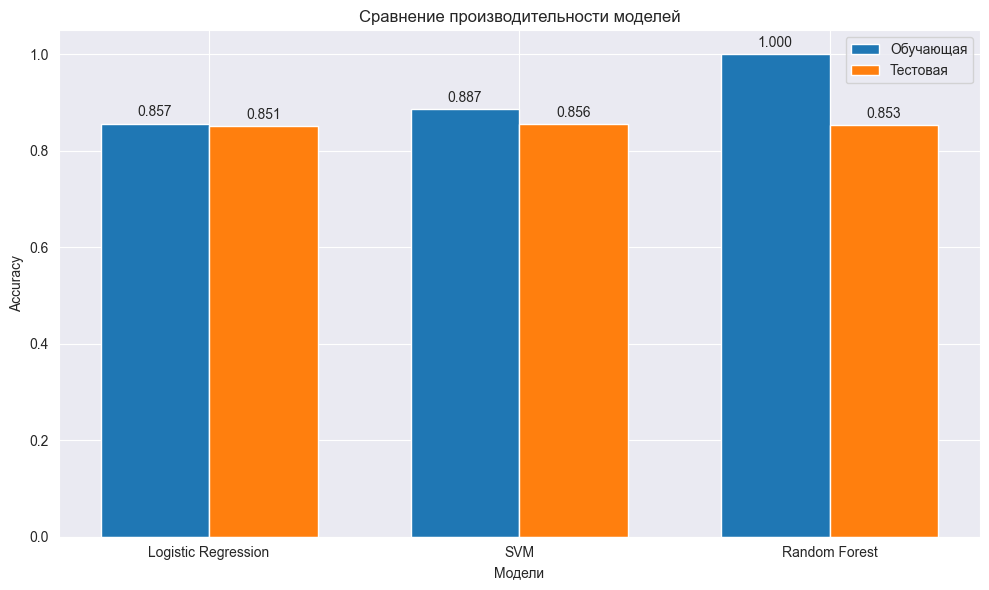

In [7]:
# подготовка данных для обучения
X = df_final.drop('RainTomorrow', axis=1)
y = df_final['RainTomorrow']

sample_fraction = 0.3  # Используем 30% данных для ускорения расчетов
X = X.sample(frac=sample_fraction)
y = y.loc[X.index]

# разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

print(f"Размер обучающей выборки: {X_train.shape}")
print(f"Размер тестовой выборки: {X_test.shape}")
print(f"Баланс классов в обучающей выборке: {y_train.value_counts(normalize=True)}")

# обучение трех моделей
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'SVM': SVC(),
    'Random Forest': RandomForestClassifier()
}

results = {}

for name, model in models.items():
    # обучение модели
    model.fit(X_train, y_train)

    # предсказания
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # оценка качества
    train_score = accuracy_score(y_train, y_train_pred)
    test_score = accuracy_score(y_test, y_test_pred)

    results[name] = {
        'train_score': train_score,
        'test_score': test_score
    }

    print(f"{name}:")
    print(f"  Обучающая выборка: {train_score:.4f}")
    print(f"  Тестовая выборка:  {test_score:.4f}")
    print(f"  Разница: {train_score - test_score:.4f}")

# визуализация результатов
models_names = list(results.keys())
train_scores = [results[name]['train_score'] for name in models_names]
test_scores = [results[name]['test_score'] for name in models_names]

x = np.arange(len(models_names))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width / 2, train_scores, width, label='Обучающая')
bars2 = ax.bar(x + width / 2, test_scores, width, label='Тестовая')

ax.set_xlabel('Модели')
ax.set_ylabel('Accuracy')
ax.set_title('Сравнение производительности моделей')
ax.set_xticks(x)
ax.set_xticklabels(models_names)
ax.legend()

for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.3f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

plt.tight_layout()
plt.show()

### Выводы
1. Все модели показывают примерно одинаковые результаты на тестовой выборке
2. Random Forest - сильное переобучение
3. SVM - небольшое переобучение
4. Logistic Regression - самые стабильные результаты

### Пункт 6
> Применить три подхода к понижению размерности путем отбора признаков (L1 регуляризация, последовательный отбор признаков, дерево решений). Сравнить полученные результаты. Сделать выводы.

In [17]:
n_features = 3

# 1: L1 регуляризация
l1_selector = SelectFromModel(LogisticRegression(penalty='l1', C=0.01, solver='liblinear'), max_features=n_features)
X_train_l1 = l1_selector.fit_transform(X_train, y_train)
X_test_l1 = l1_selector.transform(X_test)
l1_selected_features = X_train.columns[l1_selector.get_support()]
print(f"1: L1 регуляризация: {list(l1_selected_features)}")

# 2: последовательный отбор признаков
sequential_selector = SequentialFeatureSelector(
    LogisticRegression(max_iter=1000),
    n_features_to_select=n_features,
    direction='forward',
    cv=3
)
X_train_seq = sequential_selector.fit_transform(X_train, y_train)
X_test_seq = sequential_selector.transform(X_test)
seq_selected_features = X_train.columns[sequential_selector.get_support()]
print(f"2: Последовательный отбор признаков: {list(seq_selected_features)}")

# 3: дерево решений
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)

feature_importances = pd.DataFrame({
    'feature': X_train.columns,
    'importance': rf.feature_importances_
}).sort_values('importance', ascending=False)

top_features = feature_importances.head(n_features)['feature'].values
X_train_rf = X_train[top_features]
X_test_rf = X_test[top_features]
print(f"3: Дерево решений: {list(seq_selected_features)}\n")

# сравнение методов понижения размерности
reduction_methods = {
    'L1 Regularization': (X_train_l1, X_test_l1),
    'Sequential Selection': (X_train_seq, X_test_seq),
    'Random Forest Classifier': (X_train_rf, X_test_rf)
}

comparison_results = {}

for method_name, (X_train_red, X_test_red) in reduction_methods.items():
    # обучаем Logistic Regression на уменьшенных данных
    rf_comparison = LogisticRegression(max_iter=1000)
    rf_comparison.fit(X_train_red, y_train)

    train_score = rf_comparison.score(X_train_red, y_train)
    test_score = rf_comparison.score(X_test_red, y_test)

    comparison_results[method_name] = {
        'n_features': X_train_red.shape[1],
        'train_score': train_score,
        'test_score': test_score,
        'difference': train_score - test_score
    }

# результаты на исходных данных (для сравнения)
rf_original = LogisticRegression(max_iter=1000)
rf_original.fit(X_train, y_train)
original_train = rf_original.score(X_train, y_train)
original_test = rf_original.score(X_test, y_test)

print("Сравнение методов понижения размерности:")
print(f"{'Метод':<25} {'Признаков':<12} {'Train Score':<12} {'Test Score':<12} {'Разница':<10}")
print("-" * 75)
print(
    f"{'Исходные данные':<25} {X_train.shape[1]:<12} {original_train:<12.4f} {original_test:<12.4f} {original_train - original_test:<10.4f}")

for method, scores in comparison_results.items():
    print(f"{method:<25} {scores['n_features']:<12} {scores['train_score']:<12.4f} {scores['test_score']:<12.4f} {scores['difference']:<10.4f}")

1: L1 регуляризация: ['Sunshine', 'WindGustSpeed', 'Humidity3pm']
2: Последовательный отбор признаков: ['WindGustSpeed', 'WindSpeed3pm', 'Humidity3pm']
3: Дерево решений: ['WindGustSpeed', 'WindSpeed3pm', 'Humidity3pm']

Сравнение методов понижения размерности:
Метод                     Признаков    Train Score  Test Score   Разница   
---------------------------------------------------------------------------
Исходные данные           87           0.8565       0.8513       0.0052    
L1 Regularization         3            0.8422       0.8407       0.0015    
Sequential Selection      3            0.8447       0.8401       0.0046    
Random Forest Classifier  3            0.8393       0.8336       0.0057    


 ### Выводы
1. Получилось эффективно сжать данные - сокращение с 87 до 3 признаков с минимальной потерей точности
2. Ключевые метеопараметры для прогноза дождя: влажность днем, скорость ветра и солнечность
3. L1 регуляризация показала лучший результат на тестовой выборке. Также имеет наименьшее переобучение
4. Дерево решений показало самый плохой результат с самым большим переобучением

> В итоге получилось существенно упростить модель при сохранении качества прогноза дождя